In [ ]:
#Description: This program predicts if a passenger will survive on the titanic

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
https://medium.com/better-programming/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16
    #Статья 

In [3]:
titanic = pd.read_csv('http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [90]:
tit = pd.read_csv(r'C:\Users\Admin\Datascience_stepic\titanic.csv')

In [47]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Count the number of rows and columns in the data set
titanic.shape

(887, 8)

In [9]:
#Get some statistics
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [11]:
#Get a count of the number of survivors
titanic['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [48]:
tit['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

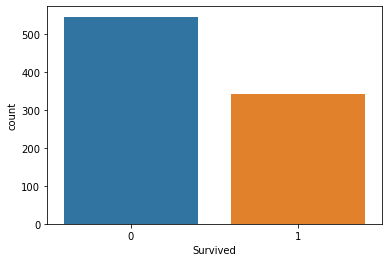

In [12]:
#Visualize the count of survivors
sns.countplot( titanic['Survived'] )

In [72]:
tit['Who'] = None

In [94]:
tit['class']= None

In [82]:
#в столбец Who добавил мужчина если пол М и старше 18 лет
tit.loc[((tit.Sex == 'male') & (tit.Who != 'child') ), 'Who'] = 'man'

In [83]:
tit.loc[((tit.Sex == 'female') & (tit.Who != 'child') ), 'Who'] = 'woman'

In [76]:
tit.loc[( (tit.Age < 18) ), 'Who'] = 'child'

In [96]:
tit.loc[tit.Pclass == 1,'class']= 'First'
tit.loc[tit.Pclass == 2,'class']= 'Second'
tit.loc[tit.Pclass == 3,'class']= 'Third'

In [97]:
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,Third
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,man,Third
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man,First
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,man,Third
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman,Third
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,Second


In [70]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Who'],
      dtype='object')

In [32]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

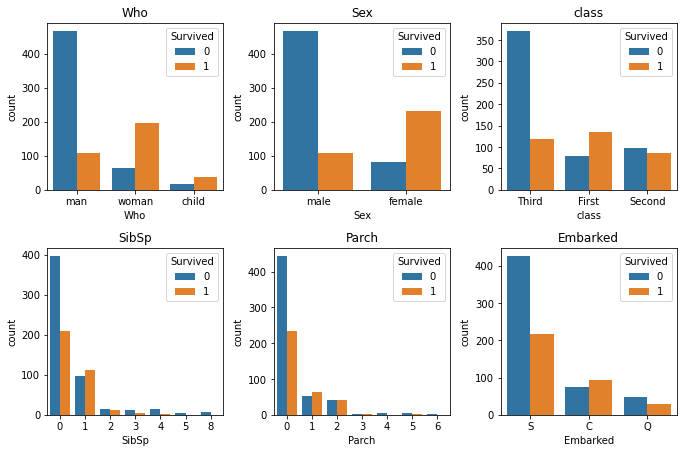

In [98]:
#Visualize the count of survivors for columns 
cols = ['Who','Sex','class','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3
#The subplot grid and figure size of each graph
fig , axs = plt.subplots(n_rows,n_cols,figsize = (n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to go through the number of columns
        ax = axs[r][c] # show where to position  each sub plot
        sns.countplot(tit[cols[i]],  hue = tit['Survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'Survived', loc = 'upper right')
plt.tight_layout()

In [86]:
#look at survival rate by sex
tit.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [99]:
#Look at survival rate by sex and class
tit.pivot_table('Survived',index='Sex',columns='class')

class,First,Second,Third
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


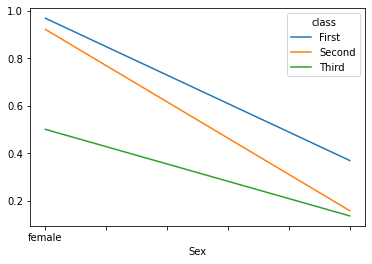

In [100]:
#Look at survival rate by sex and class visually
tit.pivot_table('Survived',index='Sex',columns='class').plot()

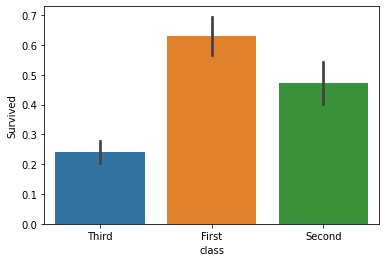

In [104]:
#Plot the survival rate of each class
sns.barplot(x='class' , y='Survived', data = tit)

In [105]:
#Look at survival rate by sex, age and class
age = pd.cut(tit['Age'],[0,18,80])#Разделил на два промежутка по возрасту
tit.pivot_table('Survived',['Sex',age],'class')

class               First    Second     Third
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

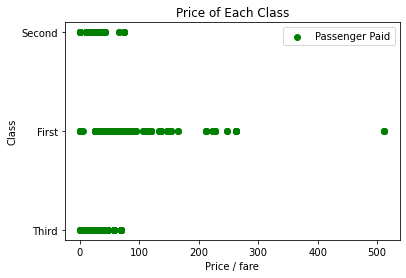

In [109]:
#Plot the prices paid of each class 
plt.scatter(tit['Fare'],tit['class'],color = 'green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [56]:
#Count the empty values in each column
tit.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [116]:
#Look at all of the values in each column & get a count
#for val in tit:
    #print(tit[val].value_counts())
    #print()

In [93]:
tit = pd.get_dummies(tit)

In [92]:
tit = tit.fillna({'Age': tit.Age.median()})

In [94]:
tit.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [91]:
#Drop the columns
tit = tit.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

#remove the rows with missing values


In [35]:
tit = tit.dropna( subset= ['Embarked'],how='all')
tit = tit.dropna( subset= ['Age'],how='all')

In [36]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
tit.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
tit.shape

(712, 8)

In [150]:
#Look at the data types
tit.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [31]:
#print the unique values in the columns
print(tit['Sex'].unique())
print(tit['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [37]:
#Encode the sex column
tit.iloc[:, 2] = labelencoder.fit_transform( tit.iloc[:, 2].values)

In [38]:
#Encode the Embarked column
tit.iloc[:, 7] = labelencoder.fit_transform( tit.iloc[:, 7].values)

In [15]:
#After Encode
print(tit['Sex'].unique())
print(tit['Embarked'].unique())

[1 0]
[2 0 1]


In [36]:
tit.dtypes
#Вск колонки числа

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [105]:
#split the data into independent 'X' and dependent 'Y' variables
X_1 = tit.iloc[:, 1:11].values
Y = tit.iloc[:, 0].values

In [106]:
#Split the data set into 80% traning and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y, test_size=0.2, random_state = 0)

In [97]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [83]:
X_train.shape

(623, 7)

In [84]:
X.shape

(418, 10)

In [98]:
#Create a function with many machine learning models
def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVC (Support vectors ) linear kernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC( RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Print the traning accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]Kneighbors Classifier Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC linear kernel Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF kernel Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    
    

In [99]:
#Get and train all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.8025682182985554
[1]Kneighbors Classifier Training Accuracy:  0.85553772070626
[2]SVC linear kernel Training Accuracy:  0.7865168539325843
[3]SVC RBF kernel Training Accuracy:  0.8459069020866774
[4]Gaussian NB Training Accuracy:  0.7913322632423756
[5]Decision Tree Training Accuracy:  0.9791332263242376
[6]Random Forest Classifier Training Accuracy:  0.9518459069020867


In [178]:
type(model)

tuple

In [100]:
#Show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    (TN, FP), (FN,TP) = confusion_matrix(Y_test, model[i].predict(X_test).ravel())
    test_score= (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accurancy ="{}"'.format(i, test_score))
    print()

[[144  24]
 [ 25  75]]
Model[0] Testing Accurancy ="0.8171641791044776"

[[146  22]
 [ 30  70]]
Model[1] Testing Accurancy ="0.8059701492537313"

[[140  28]
 [ 29  71]]
Model[2] Testing Accurancy ="0.7873134328358209"

[[149  19]
 [ 32  68]]
Model[3] Testing Accurancy ="0.8097014925373134"

[[135  33]
 [ 24  76]]
Model[4] Testing Accurancy ="0.7873134328358209"

[[141  27]
 [ 32  68]]
Model[5] Testing Accurancy ="0.7798507462686567"

[[134  34]
 [ 29  71]]
Model[6] Testing Accurancy ="0.7649253731343284"



In [43]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature':tit.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending =False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


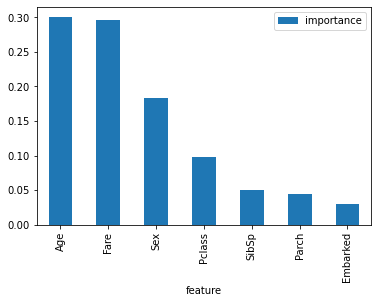

In [191]:
#Visualize the importances
importances.plot.bar()

In [71]:
titanic_test = pd.read_csv(r'C:\Users\Admin\stepik_pandas_notebooks.github.io-master\stepik_pandas_notebooks.github.io-master\titanic 2.3\titanic\test.csv',index_col=0)

In [101]:
X = titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median(),'Fare': 95})

In [79]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,0,0,0,1
894,2,62.0,0,0,9.6875,0,1,0,1,0
895,3,27.0,0,0,8.6625,0,1,0,0,1
896,3,22.0,1,1,12.2875,1,0,0,0,1


In [80]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [102]:
pred_1 = model[1].predict(X)
pred_2 = model[2].predict(X)
pred_3 = model[3].predict(X)
pred_4 = model[4].predict(X)
pred_5 = model[5].predict(X)
pred_6 = model[6].predict(X)

In [103]:
pred_1 = pd.DataFrame({'Survived':pred_1, 'PassengerId':X.index})
pred_2 = pd.DataFrame({'Survived':pred_2, 'PassengerId':X.index})
pred_3 = pd.DataFrame({'Survived':pred_3, 'PassengerId':X.index})
pred_4 = pd.DataFrame({'Survived':pred_4, 'PassengerId':X.index})
pred_5 = pd.DataFrame({'Survived':pred_5, 'PassengerId':X.index})
pred_6 = pd.DataFrame({'Survived':pred_6, 'PassengerId':X.index})

In [104]:
pred_1.to_csv("pred_1.csv", index=False)
pred_2.to_csv("pred_2.csv", index=False)
pred_3.to_csv("pred_3.csv", index=False)
pred_4.to_csv("pred_4.csv", index=False)
pred_5.to_csv("pred_5.csv", index=False)
pred_6.to_csv("pred_6.csv", index=False)

In [44]:
#print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [193]:
#

#Pclass        int64
#Sex           int64
#Age         float64
#SibSp         int64
#Parch         int64
#Fare        float64
#Embarked      int64

In [63]:
my_survival = [[3, 0, 60, 0, 0, 80, 0]]
#my_survival = [[1, 0, 22, 0, 0, 150, 0 ]]
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#my_survival_scaled = sc.fit_transform(my_survival)

#print prediction of my_survival using Random forest Classifier
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print('Oh no! You did not make it')
else:
    print('Nice! You survived')

[1]
Nice! You survived


In [59]:
my_survival

[[3, 0, 60, 0, 0, 80, 0]]